<a href="https://colab.research.google.com/github/devjuniorflores/Robot_Trading_C1_DS_AluraLatam/blob/main/Robot_Trading_C1_DSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Creando el Ambiente

## Bibliotecas requeridas para el desarrollo del proyecto

**Pandas**: Esta librería será utilizada para estructurar y analizar los datos financieros del Bitcoin. Ayudará en la manipulación de la información recopilada, permitiendo limpiar y preparar los datos para su análisis.

**Matplotlib**: Se empleará para visualizar gráficamente los datos del Bitcoin, generando representaciones visuales de la información recopilada. Esto incluirá la creación de gráficos que representen la evolución de precios y tendencias a lo largo del tiempo.

**NumPy**: Será empleado para realizar cálculos numéricos y operaciones matemáticas sobre los datos financieros del Bitcoin. Ayudará en la manipulación eficiente de arreglos y datos numéricos.

**yfinance**: Esta interfaz será utilizada para obtener datos actualizados de Yahoo Finance relacionados con el Bitcoin, permitiendo acceder a información detallada sobre los precios, volúmenes y otras métricas financieras.

**BeautifulSoup** (bs4): Se utilizará para analizar y extraer datos relevantes del HTML y XML de diversas fuentes, como páginas web financieras. Esto permitirá extraer información específica sobre el Bitcoin desde estas fuentes.

**Time**: Este módulo se empleará para realizar operaciones que involucren temporización y programación de intervalos, como la espera entre actualizaciones de datos o ejecución de tareas periódicas.

**DateTime**: Utilizaremos este módulo para manejar y manipular fechas y horas relacionadas con los datos financieros del Bitcoin, permitiendo realizar análisis de series temporales y visualizaciones por fechas.

**Requests**: Esta librería será empleada para realizar solicitudes HTTP, permitiendo acceder a datos financieros desde fuentes externas como APIs o páginas web.

**Urllib.request**: Se utilizará para abrir y acceder a URL, lo que permitirá la conexión con diferentes fuentes de información en la web, facilitando la obtención de datos del Bitcoin desde distintas fuentes en línea.

IPython.display: Este paquete se empleará para mostrar contenido multimedia y personalizar la presentación de datos y gráficos generados, especialmente en entornos como Jupyter Notebook. Esto mejorará la presentación y comprensión de la información financiera del Bitcoin.

## Instalación de las bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import bs4
import time
import datetime
import requests
import urllib.request as urllib_request
from IPython.display import clear_output
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request

## Descripcion de las bibliotecas requeridas

In [2]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Numpy | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'
print('------')
!pip show yfinance | grep 'Name\|Version'
print('------')
!pip show beautifulsoup4 | grep 'Name\|Version'
print('------')

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: numpy
Version: 1.23.5
------
Name: matplotlib
Version: 3.7.1
------
Name: yfinance
Version: 0.2.31
------
Name: beautifulsoup4
Version: 4.11.2
------


#2. Recolección de los datos

## 2.1.Precios historicos del bitcoin


### Obtener los datos del Bitcoin de los ultimos 7 dias en intervalos de cada 5 minutos

In [3]:
def importar_base_bitcoin(): #Creando funcion para la recoleccion de los datos historicos del Bitcoin
  global df_bitcoin #Creando la variable global df_bitcoin
  btc = yf.Ticker("BTC-USD") #Indicando el ticket a utilizar (BTC-USD: Bitcoin)
  df_bitcoin = btc.history(period="8d", interval="5m") #Alojando en una variable global "df_bitcoin" los datos requeridos

## Precio y tendencia actual del Bitcoin

### Extrayendo desde ***CoinMarketCap.com***

In [4]:
def extraer_tendencias(): #Definiendo funcion para la extraccion del precio actual y tendencia del Bitcoin
  global precio_actual, tendencia  # Declaración de variables globales para precio y tendencia
  url = "https://coinmarketcap.com/"  # URL de la página a analizar

  req = requests.get(url)  # Realizar una solicitud GET para obtener la página
  response = req.text  # Obtener el contenido HTML de la página
  soup = BeautifulSoup(response, "html.parser")  # Crear un objeto BeautifulSoup para analizar el HTML

  tbody = soup.find("tbody")  # Encontrar la sección (tbody) que contiene los datos relevantes
  # Extraer el precio actual de la criptomoneda (BTC)
  td_precio_actual = tbody.tr.findAll("td")[3]
  precio_actual = float(td_precio_actual.find("span").getText().replace("$", '').replace(',', '').replace('USD', ''))

  # Determinar la tendencia actual (Alza o Baja)
  td_tendencia_actual = tbody.tr.findAll("td")[4]
  indicador = td_tendencia_actual.find('span', class_="icon-Caret-down")  # Buscar el indicador de tendencia
  if indicador is None:  # Si no se encuentra el indicador de baja
      tendencia = "Alta"  # La tendencia es "Alta" (alza)
  else:
      tendencia = "Baja"  # Si se encuentra el indicador de baja, la tendencia es "Baja" (bajada)

### Extrayendo desde _**Cripto.com**_ (Respaldo)

In [5]:
url_crypto = "https://crypto.com/price/bitcoin"  # URL de la página de la criptomoneda Bitcoin en crypto.com

# Encabezados simulando ser un navegador web para evitar posibles restricciones de acceso
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'
}

# Creación de una solicitud con los encabezados definidos
req = Request(url_crypto, headers=headers)
response_crypto = urlopen(req)  # Realización de la solicitud y obtención de la respuesta
html_crypto = response_crypto.read()  # Lectura del contenido HTML de la página

soup_crypto = BeautifulSoup(html_crypto, "html.parser")  # Creación de un objeto BeautifulSoup para analizar el HTML

# Extracción del precio actual de Bitcoin desde el HTML
div_precio_actual = soup_crypto.find("h2", class_="chakra-heading css-fophx6")
precio_actual = float(div_precio_actual.find("span").getText().replace("$", '').replace(',', '').replace('USD', ''))

precio_actual  # Devuelve el precio actual de Bitcoin

34537.96

#3. Limpieza de Datos

## 3.1.Entendiendo el dataframe y sus campos mas importantes a tomar en cuenta

**Datetime**: Es el índice del dataframe, y contiene la fecha y hora del intervalo seleccionado, no puede estar duplicado.

**Open**: Contiene el precio del Bitcoin al inicio del intervalo.

**High**: Contiene el precio más alto del Bitcoin durante el intervalo.

**Low**: Contiene el precio más bajo del Bitcoin durante el intervalo.

**Close**: Contiene el precio del Bitcoin al final del intervalo.

**Volume**: Contiene el total de transacciones hechas durante el intervalo.

### Mostrar datos estadísticos del dataframe

In [6]:
importar_base_bitcoin()
df_bitcoin.info()
df_bitcoin.describe().round(0)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1979 entries, 2023-10-25 00:00:00+00:00 to 2023-11-01 01:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1979 non-null   float64
 1   High          1979 non-null   float64
 2   Low           1979 non-null   float64
 3   Close         1979 non-null   float64
 4   Volume        1979 non-null   int64  
 5   Dividends     1979 non-null   float64
 6   Stock Splits  1979 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 123.7 KB


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1979.0,1979.0,1979.0,1979.0,1979.0,1979.0,1979.0
mean,34268.0,34284.0,34253.0,34269.0,13203143.0,0.0,0.0
std,264.0,265.0,261.0,263.0,39513643.0,0.0,0.0
min,33451.0,33474.0,33417.0,33455.0,0.0,0.0,0.0
25%,34084.0,34092.0,34074.0,34085.0,0.0,0.0,0.0
50%,34234.0,34254.0,34214.0,34232.0,0.0,0.0,0.0
75%,34479.0,34493.0,34467.0,34480.0,12368384.0,0.0,0.0
max,35116.0,35134.0,34951.0,35044.0,718720000.0,0.0,0.0


###Mostrar un boxplot sin tratar aún los datos

<Axes: >

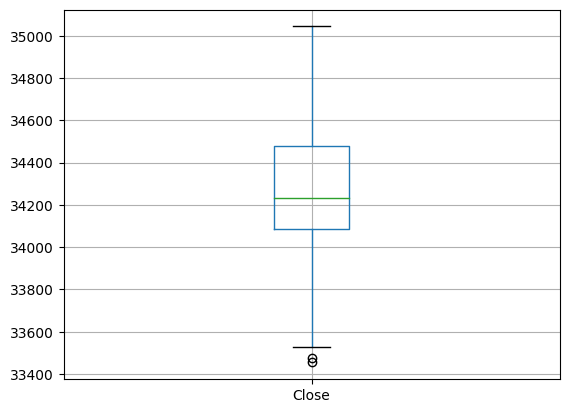

In [7]:
df_bitcoin.boxplot(['Close'])

## 3.2.Limpieza de Datos paso a paso

###Creando una copia del dataframe para no trabajar sobre esta

In [8]:
df_bitcoin_limpio = df_bitcoin
df_bitcoin_limpio

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-10-25 00:00:00+00:00,33916.042969,33941.207031,33916.042969,33941.207031,0,0.0,0.0
2023-10-25 00:05:00+00:00,33938.441406,33942.093750,33914.734375,33936.296875,0,0.0,0.0
2023-10-25 00:10:00+00:00,33935.175781,33950.281250,33886.140625,33886.140625,0,0.0,0.0
2023-10-25 00:15:00+00:00,33852.980469,33910.554688,33852.980469,33910.554688,16486400,0.0,0.0
2023-10-25 00:20:00+00:00,33933.507812,33934.132812,33913.386719,33913.386719,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-01 00:40:00+00:00,34599.437500,34599.437500,34532.910156,34532.910156,5244928,0.0,0.0
2023-11-01 00:45:00+00:00,34528.011719,34560.507812,34528.011719,34560.507812,306705408,0.0,0.0
2023-11-01 00:50:00+00:00,34552.320312,34555.968750,34527.500000,34527.500000,5731328,0.0,0.0


###Eliminando campos no relevantes para el análisis

In [9]:
df_bitcoin_limpio = df_bitcoin_limpio.drop(['Dividends','Stock Splits'], axis=1)
df_bitcoin_limpio

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-10-25 00:00:00+00:00,33916.042969,33941.207031,33916.042969,33941.207031,0
2023-10-25 00:05:00+00:00,33938.441406,33942.093750,33914.734375,33936.296875,0
2023-10-25 00:10:00+00:00,33935.175781,33950.281250,33886.140625,33886.140625,0
2023-10-25 00:15:00+00:00,33852.980469,33910.554688,33852.980469,33910.554688,16486400
2023-10-25 00:20:00+00:00,33933.507812,33934.132812,33913.386719,33913.386719,0
...,...,...,...,...,...
2023-11-01 00:40:00+00:00,34599.437500,34599.437500,34532.910156,34532.910156,5244928
2023-11-01 00:45:00+00:00,34528.011719,34560.507812,34528.011719,34560.507812,306705408
2023-11-01 00:50:00+00:00,34552.320312,34555.968750,34527.500000,34527.500000,5731328


###Eliminando los duplicados en el indice

In [10]:
df_bitcoin_limpio.drop_duplicates(inplace=True)
df_bitcoin_limpio

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-10-25 00:00:00+00:00,33916.042969,33941.207031,33916.042969,33941.207031,0
2023-10-25 00:05:00+00:00,33938.441406,33942.093750,33914.734375,33936.296875,0
2023-10-25 00:10:00+00:00,33935.175781,33950.281250,33886.140625,33886.140625,0
2023-10-25 00:15:00+00:00,33852.980469,33910.554688,33852.980469,33910.554688,16486400
2023-10-25 00:20:00+00:00,33933.507812,33934.132812,33913.386719,33913.386719,0
...,...,...,...,...,...
2023-11-01 00:40:00+00:00,34599.437500,34599.437500,34532.910156,34532.910156,5244928
2023-11-01 00:45:00+00:00,34528.011719,34560.507812,34528.011719,34560.507812,306705408
2023-11-01 00:50:00+00:00,34552.320312,34555.968750,34527.500000,34527.500000,5731328


###Buscando valores nulos en la columna 'Close' para posteriormente tratarlos

In [11]:
df_bitcoin_limpio[df_bitcoin_limpio['Close'].isnull()]

,Open,High,Low,Close,Volume
Datetime,,,,,


###Eliminando valores nulos del dataframe

In [12]:
a = df_bitcoin_limpio.shape[0]
df_bitcoin_limpio.dropna(subset = ['Close'], inplace=True)
b = df_bitcoin_limpio.shape[0]
print(f"Se han eliminado {a-b} filas")

Se han eliminado 0 filas


###Verificando que todos los registros de la base tengan un volumen de transacción mayor a 0

In [13]:
seleccion = (df_bitcoin_limpio['Volume']==0)

In [14]:
df_bitcoin_limpio = df_bitcoin_limpio[~seleccion]
df_bitcoin_limpio

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-10-25 00:15:00+00:00,33852.980469,33910.554688,33852.980469,33910.554688,16486400
2023-10-25 07:45:00+00:00,33816.480469,33822.468750,33709.109375,33822.468750,53430272
2023-10-25 07:50:00+00:00,33803.085938,33868.492188,33803.085938,33868.492188,8282112
2023-10-25 09:15:00+00:00,34063.812500,34071.816406,34047.765625,34047.765625,3244032
2023-10-25 09:20:00+00:00,34054.421875,34088.605469,34054.421875,34088.605469,2584576
...,...,...,...,...,...
2023-11-01 00:35:00+00:00,34584.746094,34605.472656,34584.746094,34603.691406,29455360
2023-11-01 00:40:00+00:00,34599.437500,34599.437500,34532.910156,34532.910156,5244928
2023-11-01 00:45:00+00:00,34528.011719,34560.507812,34528.011719,34560.507812,306705408


###Filtrando o seleccionando únicamente los registros cuyo precio(Close) se encuentren entre el 1er cuartil(Q1) y el 3er cuartil(Q3) del boxplot

In [15]:
close = df_bitcoin_limpio['Close']
Q1 = close.quantile(.25)
Q3 = close.quantile(.75)
print(Q1,Q3)

34157.478515625 34559.36328125


###Identificando y eliminando los outliers en el precio del Bitcoin de la columna "Close"

In [16]:
seleccion = ((close>=Q1)&(close<=Q3))
df_bitcoin_limpio_ = df_bitcoin_limpio[seleccion]
df_bitcoin_limpio

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-10-25 00:15:00+00:00,33852.980469,33910.554688,33852.980469,33910.554688,16486400
2023-10-25 07:45:00+00:00,33816.480469,33822.468750,33709.109375,33822.468750,53430272
2023-10-25 07:50:00+00:00,33803.085938,33868.492188,33803.085938,33868.492188,8282112
2023-10-25 09:15:00+00:00,34063.812500,34071.816406,34047.765625,34047.765625,3244032
2023-10-25 09:20:00+00:00,34054.421875,34088.605469,34054.421875,34088.605469,2584576
...,...,...,...,...,...
2023-11-01 00:35:00+00:00,34584.746094,34605.472656,34584.746094,34603.691406,29455360
2023-11-01 00:40:00+00:00,34599.437500,34599.437500,34532.910156,34532.910156,5244928
2023-11-01 00:45:00+00:00,34528.011719,34560.507812,34528.011719,34560.507812,306705408


###Calculando el precio promedio(Close) de esta selección y guárdandola en la variable "media_bitcoin"

In [17]:
media_bitcoin = df_bitcoin_limpio.Close.mean().round()
media_bitcoin

34342.0

## 3.3.Funcion Limpieza de Datos (Resumen pasos anteriores)

In [18]:
def limpieza_datos():
  global media_bitcoin  # Declaración de variables globales para media_bitcoin y df_bitcoin_limpio
  global df_bitcoin_limpio

  df_bitcoin_limpio = df_bitcoin  # Asignación del DataFrame original a df_bitcoin_limpio

  # Eliminación de columnas 'Dividends' y 'Stock Splits' del DataFrame df_bitcoin_limpio
  df_bitcoin_limpio = df_bitcoin_limpio.drop(['Dividends', 'Stock Splits'], axis=1)

  # Eliminar filas duplicadas en el DataFrame df_bitcoin_limpio
  df_bitcoin_limpio.drop_duplicates(inplace=True)

  # Eliminar filas con valores NaN en la columna 'Close' del DataFrame df_bitcoin_limpio
  df_bitcoin_limpio.dropna(subset=['Close'], inplace=True)

  # Crear una selección booleana para identificar las filas con volumen igual a cero en el DataFrame
  seleccion_volume = (df_bitcoin_limpio['Volume'] == 0)

  # Eliminar filas donde el volumen es igual a cero en el DataFrame df_bitcoin_limpio
  df_bitcoin_limpio = df_bitcoin_limpio[~seleccion_volume]

  # Calcular los percentiles (Q1 y Q3) de la columna 'Close' en el DataFrame df_bitcoin_limpio
  close = df_bitcoin_limpio['Close']
  Q1 = close.quantile(.25)
  Q3 = close.quantile(.75)

  # Crear una selección booleana para identificar valores dentro del rango intercuartílico (IQR)
  seleccion = ((close >= Q1) & (close <= Q3))

  # Filtrar el DataFrame df_bitcoin_limpio para mantener solo valores dentro del rango IQR
  df_bitcoin_limpio = df_bitcoin_limpio[seleccion]

  # Calcular la media de la columna 'Close' en el DataFrame df_bitcoin_limpio y redondear el resultado
  media_bitcoin = df_bitcoin_limpio['Close'].mean().round()


#4. Toma de Decisiones

## 4.1.Generando la lógica de la toma de decisiones

In [28]:
def tomar_decisiones():
  global algoritmo_decision  # Declaración de variables globales para algoritmo_decision y color
  global color

  if (precio_actual >= media_bitcoin) and (tendencia == "Baja"):
      # Si el precio actual es mayor o igual a la media y la tendencia es a la baja
      color = "red"  # Se asigna el color rojo para representar una decisión de "Vender"
      algoritmo_decision = "vender"  # Se establece la decisión del algoritmo como "Vender"

  elif (precio_actual < media_bitcoin) and (tendencia == "Alta"):
      # Si el precio actual es menor a la media y la tendencia es al alza
      color = "green"  # Se asigna el color verde para representar una decisión de "Comprar"
      algoritmo_decision = "comprar"  # Se establece la decisión del algoritmo como "Comprar"

  else:
      # En caso contrario (ninguna de las condiciones anteriores)
      color = "orange"  # Se asigna el color naranja para representar una decisión de "Esperar"
      algoritmo_decision = "esperar"  # Se establece la decisión del algoritmo como "Esperar"

#5. Visualización

## 5.1.Generando la visualización

In [31]:
def visualizacion():
  # Imprime la hora de ejecución del script
  print("Hora de ejecución: ", datetime.datetime.now())

  # Imprime el precio actual del Bitcoin, el precio medio, la tendencia y la decisión del algoritmo
  print("Precio Actual Bitcoin: ", precio_actual)
  print("Precio Medio Bitcoin: ", media_bitcoin)
  print("Tendencia: ", tendencia)
  print("Decisión: ", algoritmo_decision)

  # Se agrega una nueva columna 'Promedio' en el DataFrame df_bitcoin con el valor de media_bitcoin
  df_bitcoin['Promedio'] = media_bitcoin

  # Se configuran los detalles del gráfico
  plt.figure(figsize=(16, 5))
  plt.title("Bitcoin Price ($)", fontsize=18, fontweight='bold', color="#00DA59")

  # Se trazan las series de tiempo para 'Close' y 'Promedio' en el DataFrame df_bitcoin
  plt.plot(df_bitcoin.index, df_bitcoin['Close'])  # Gráfico de precios 'Close'
  plt.plot(df_bitcoin.index, df_bitcoin['Promedio'])  # Gráfico del promedio

  # Se agrega un texto en el gráfico para representar la decisión con colores basados en la variable color
  plt.annotate(str("Bitbot te recomienda " + algoritmo_decision), xy=(df_bitcoin.index[-550], round(max(df_bitcoin['Close']))-100),
                xytext=(df_bitcoin.index[-550], round(max(df_bitcoin['Close']))-100), fontsize=15, color=color, fontweight='bold',
                style='italic', backgroundcolor='yellow')

  # Se muestra el gráfico
  plt.show()

# 6. Automatización

## 6.1.Creando la automatización del bot y su ejecución

Hora de ejecución:  2023-11-01 01:15:13.562196
Precio Actual Bitcoin:  34528.0
Precio Medio Bitcoin:  34368.0
Tendencia:  Baja
Decisión:  vender


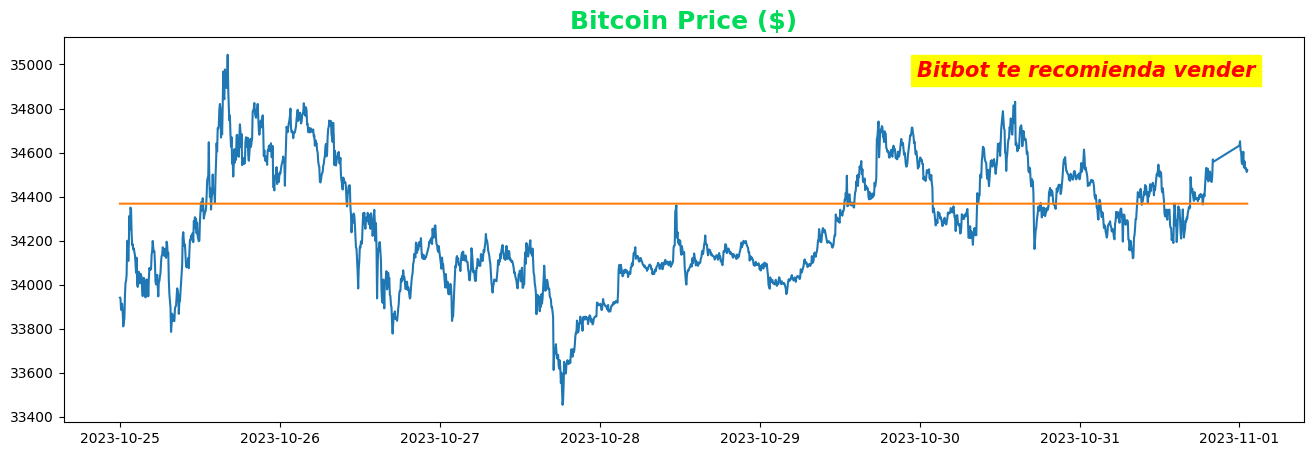

In [ ]:
while True:
    clear_output()  # Borra la salida anterior en un entorno

    # Llama a las funciones necesarias para importar, procesar, analizar y visualizar los datos
    importar_base_bitcoin()  # Importa datos actualizados del Bitcoin
    extraer_tendencias()  # Extrae tendencias actuales
    limpieza_datos()  # Realiza la limpieza y preparación de los datos
    tomar_decisiones()  # Toma decisiones basadas en los datos procesados
    visualizacion()  # Genera y muestra gráficos con los datos procesados

    time.sleep(300)  # Espera 5 minutos antes de volver a ejecutar el ciclo